### Printing out the Branches in the data.

In [4]:
import ROOT
f1 = ROOT.TFile.Open("/data/eos/run3214/run3214_tanner_processed_file.root")
events = f1.Get("events")
events.Print()
import ROOT
f2 = ROOT.TFile.Open("/data/eos/run3056/run3056_all.root")
output = f2.Get("output")
output.Print()

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :  4390166 : Total =     33975803549 bytes  File  Size = 10756015396 *
*        :          : Tree compression factor =   3.16                       *
******************************************************************************
*Br    0 :event_number : event_number/I                                      *
*Entries :  4390166 : Total  Size=   17663512 bytes  File Size  =    6247199 *
*Baskets :     1015 : Basket Size=      32000 bytes  Compression=   2.82     *
*............................................................................*
*Br    1 :nhit      : nhit/I                                                 *
*Entries :  4390166 : Total  Size=   17655360 bytes  File Size  =    6490901 *
*Baskets :     1015 : Basket Size=      32000 bytes  Compression=   2.72     *
*..................................................

### Open the trees for the data.

In [6]:
import ROOT
# Create RDataFrame from the events tree of the input file.
rdf1 = ROOT.RDataFrame("events", "/data/eos/run3214/run3214_tanner_processed_file.root")
rdf2 = ROOT.RDataFrame("output", "/data/eos/run3056/run3056_all.root")

### Load the libraries here.

In [7]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## NHit Plot for the new run that Tanner took with 6 muons paddles connected into the 

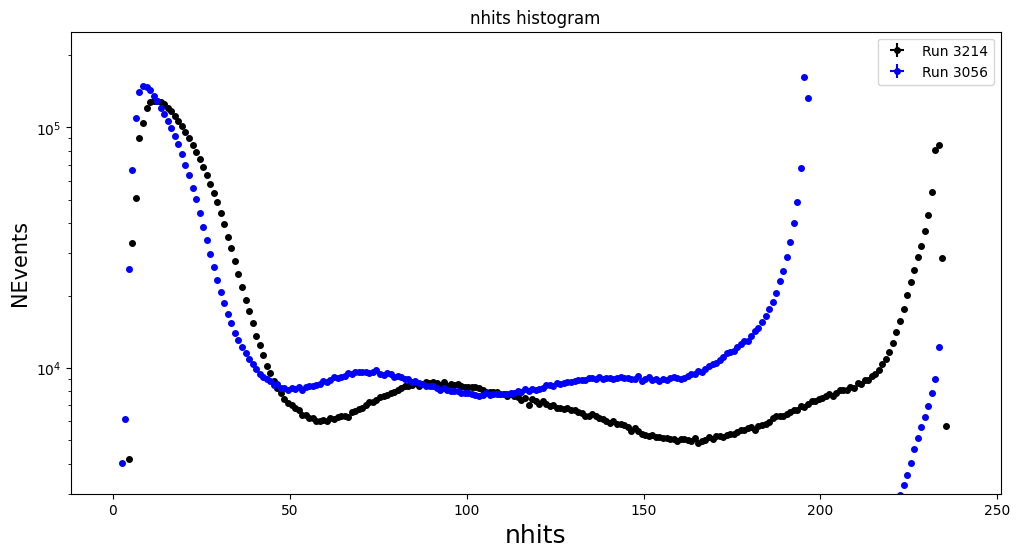

In [4]:
# Extract nhits values
nhits1 = rdf1.AsNumpy(columns=["nhit"])["nhit"]
nhits2 = rdf2.AsNumpy(columns=["digitNhits"])["digitNhits"]

# Histogramming
count1, bin_edges = np.histogram(nhits1, bins=np.arange(0, 240, 1))
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
ErrCount1 = np.sqrt(count1)
ErrBin = 0.5  # horizontal error bars

# Histogramming
count2, _ = np.histogram(nhits2, bin_edges)
ErrCount2 = np.sqrt(count2)
count2 = np.sum(count1)/np.sum(count2)*count2

# Plotting
plt.figure(figsize=(12, 6))
plt.title(f"nhits histogram")
plt.errorbar(bin_centers, count1, yerr=ErrCount1, xerr=ErrBin,
             ls='', marker='o', mfc='black', ms=4, mec='black',
             ecolor='black', label="Run 3214")

plt.errorbar(bin_centers, count2, yerr=ErrCount2, xerr=ErrBin,
             ls='', marker='o', mfc='blue', ms=4, mec='blue',
             ecolor='blue', label="Run 3056")
plt.xlabel("nhits", fontsize=18)
plt.ylabel("NEvents", fontsize=15)
plt.yscale('log')
plt.ylim(3000,250_000)
plt.legend()
plt.show()

I was expecting the endpoint to increase by 6 due to the paddles. But the end point is at ~ 240. Were there substantial number of PMT channels that got enabled with the latest runs?

Tanner stated that the run is a custom processing which does not remove the cross talk. So the noise in the channels are generating hits.


### Let's look at charge to see if we can cut the cross talk.

<class 'numpy.ndarray'>
(328938438,)


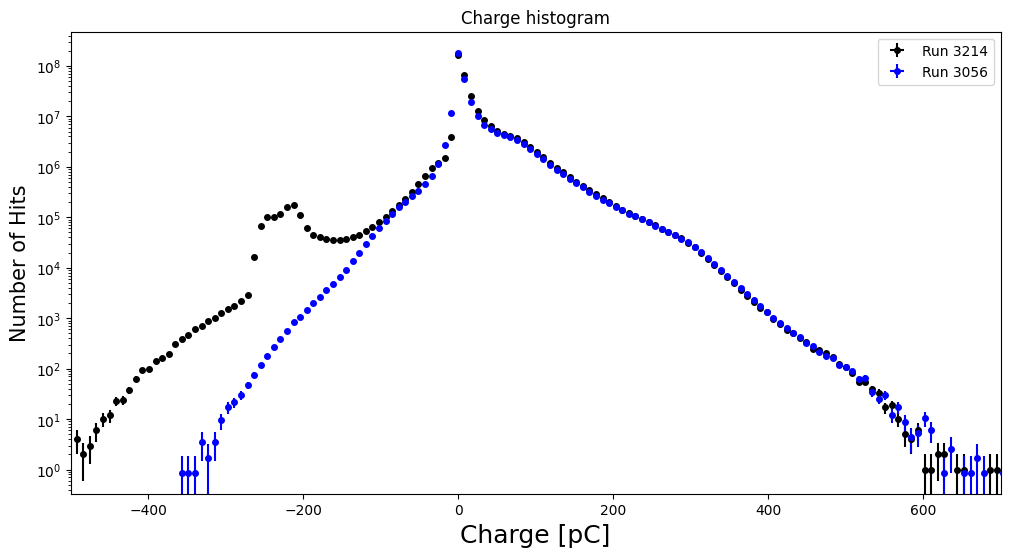

In [5]:
# Extract nhits values
var1 = np.concatenate(rdf1.AsNumpy(columns=["charge"])["charge"])
var2 = np.concatenate(rdf2.AsNumpy(columns=["digitCharge"])["digitCharge"])

print(type(var1))
print(var1.shape)

# Histogramming
count1, bin_edges = np.histogram(var1, bins=200)
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
ErrCount1 = np.sqrt(count1)
ErrBin = 0.5  # horizontal error bars

# Histogramming
count2, _ = np.histogram(var2, bin_edges)
ErrCount2 = np.sqrt(count2)
count2 = np.sum(count)/np.sum(count2)*count2

# Plotting
plt.figure(figsize=(12, 6))
plt.title("Charge histogram")
plt.errorbar(bin_centers, count1, yerr=ErrCount1, xerr=ErrBin,
             ls='', marker='o', mfc='black', ms=4, mec='black',
             ecolor='black', label="Run 3214")

plt.errorbar(bin_centers, count2, yerr=ErrCount2, xerr=ErrBin,
             ls='', marker='o', mfc='blue', ms=4, mec='blue',
             ecolor='blue', label="Run 3056")
plt.xlabel("Charge [pC]", fontsize=18)
plt.ylabel("Number of Hits", fontsize=15)
plt.yscale('log')
plt.xlim(-500,700)
plt.legend()
plt.show()

### Let's try to cut out all the negative charges hits and make the nhit plots again.

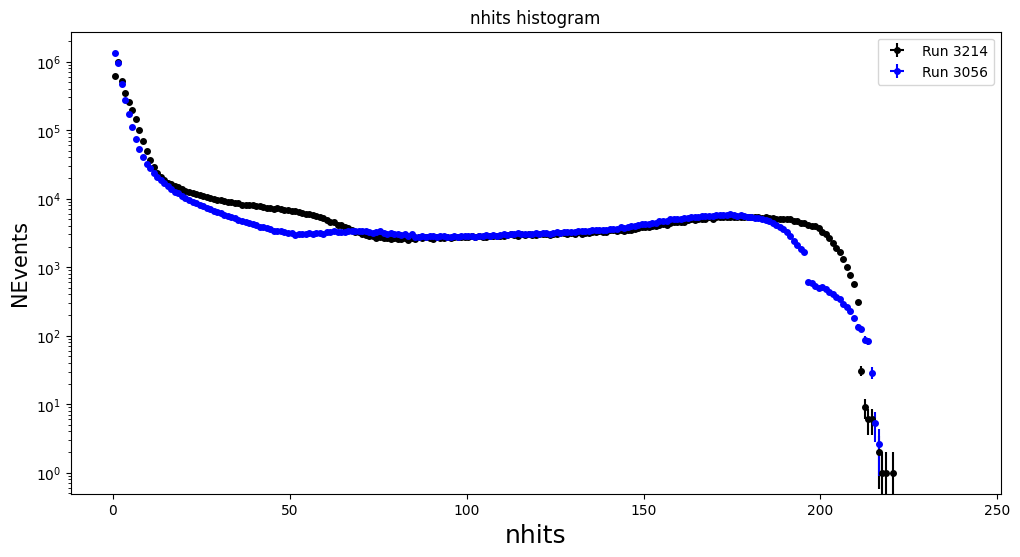

In [6]:
# Extract nhits values
var1 = rdf1.AsNumpy(columns=["charge"])["charge"]
var2 = rdf2.AsNumpy(columns=["digitCharge"])["digitCharge"]

# Count how many charges > 0 for each event
nhits1 = np.array([np.sum(np.array(v) > 10) for v in var1])
nhits2 = np.array([np.sum(np.array(v) > 10) for v in var2])

# Histogramming
count1, bin_edges = np.histogram(nhits1, bins=np.arange(0, 240, 1))
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
ErrCount1 = np.sqrt(count1)
ErrBin = 0.5  # horizontal error bars

# Histogramming
count2, _ = np.histogram(nhits2, bin_edges)
ErrCount2 = np.sqrt(count2)
count2 = np.sum(count1)/np.sum(count2)*count2

# Plotting
plt.figure(figsize=(12, 6))
plt.title(f"nhits histogram")
plt.errorbar(bin_centers, count1, yerr=ErrCount1, xerr=ErrBin,
             ls='', marker='o', mfc='black', ms=4, mec='black',
             ecolor='black', label="Run 3214")

plt.errorbar(bin_centers, count2, yerr=ErrCount2, xerr=ErrBin,
             ls='', marker='o', mfc='blue', ms=4, mec='blue',
             ecolor='blue', label="Run 3056")
plt.xlabel("nhits", fontsize=18)
plt.ylabel("NEvents", fontsize=15)
plt.yscale('log')
plt.ylim(1000,2e6)
plt.legend()
plt.show()

### Let's look at some of the muon paddle hits. First let's plot the LCN of hits.

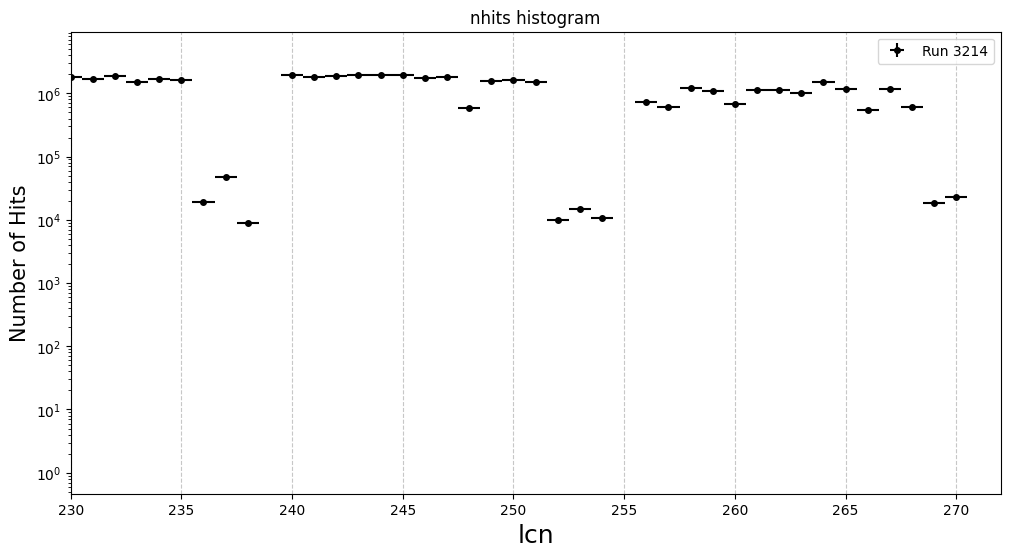

In [17]:
# Extract nhits values
var1 = np.concatenate(rdf1.AsNumpy(columns=["lcn"])["lcn"])

# Histogramming
count1, bin_edges = np.histogram(var1, bins=np.arange(0, 275, 1))
bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]
ErrCount1 = np.sqrt(count1)
ErrBin = 0.5  # horizontal error bars

# Plotting
plt.figure(figsize=(12, 6))
plt.title(f"nhits histogram")
plt.errorbar(bin_edges[:-1], count1, yerr=ErrCount1, xerr=ErrBin,
             ls='', marker='o', mfc='black', ms=4, mec='black',
             ecolor='black', label="Run 3214")

plt.xlabel("lcn", fontsize=18)
plt.ylabel("Number of Hits", fontsize=15)
plt.yscale('log')
plt.xlim(230,272)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Debug area ##

In [24]:
print(var1.shape)
print(var1[0])
print(np.concatenate(var1))

(4390166,)
{ 63.844401, 55.683594, 43.561198, 78.084310, 87.167969, 56.054687, 64.739583, -1.4306641, 0.89680990, 208.63281, 127.33236, 141.17025, 112.42676, 115.51432, 78.888346, 97.356771, 144.07552, 194.24967, 166.51367, 49.264323, 12.000326, 15.136719, 129.11133, 141.25651, 80.092773, 141.44857, 9.9788411, 6.9140625, 16.534831, 41.534831, 90.183919, 54.589844, 6.8294271, 6.1735026, 26.015625, 49.956055, 55.074870, 22.994792, 10.633138, 9.2740885, 3.7744141, 37.532552, 61.531576, 12.980143, 13.277995, 9.6044922, 10.231120, 30.582682, 51.931966, 72.906901, 4.8746745, 8.0794271, 16.582031, 33.798828, 43.523763, 46.974284, 0.071614583, -0.066731771, 19.519857, 21.565755, 33.336589, 37.626953, 68.256836, 3.6067708, 8.6197917, 24.791667, 20.568034, 36.832682, 40.779622, 58.235677, 17.446289, 18.413086, 8.6230469, 29.874674, 34.628906, 45.359701, 16.197917, 10.875651, 14.853516, 20.958659, 23.230794, 37.050781, 15.444336, 15.470378, 19.607747, 32.164714, 33.317057, 9.2252604, 7.1191406, 2